In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

import pb_f2_infer_multi as parent_script

Device: cpu


In [9]:
true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e_form_dataset/badran_pacbio_pivot_1pct.csv')
true_df = true_df.rename(columns = {col: int(col.replace('hrs', '')) for col in true_df.columns if 'hrs' in col})

hrs_cols = [col for col in true_df.columns if col != 'Abbrev genotype']
idx_to_hr = {str(idx): col for idx, col in enumerate(hrs_cols)}

read_lens = [1, 50, 75, 100, 150, 200, 250, 300, 400, 500, 600]

preds = dict()
for read_len in read_lens:
#     df = pd.read_csv(f'/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/model_1/genotype_matrix_{i}.csv', index_col = 0)
    df = pd.read_csv(parent_script.out_dir + f'genotype_matrix_readlen_{read_len}.csv', index_col = 0)
    df['Abbrev genotype'] = df.index
    df = df.rename(columns = idx_to_hr)
    preds[read_len] = df

## final only

In [10]:
def plot_trajectories(df, out_fn = '', title = ''):

    melt_df = df.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    
    fig, ax = plt.subplots(figsize = (10, 6))

    gts = sorted(list(set(df['Abbrev genotype'])))
    colors = sns.color_palette('hls', int(len(gts) * 1.5))
    palette = {gt: color for gt, color in zip(gts, colors)}
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
        ax = ax,
    )
    # plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.get_legend().remove()
    plt.xticks(rotation = 90)
    plt.grid(alpha = 0.2)
    plt.ylim(bottom = 0, top = 100)
    plt.xlim(left = 0, right = 528)
    sns.despine()
    
    if title != '':
        plt.title(title)
    
    plt.tight_layout()
    if out_fn != '':
        plt.savefig(out_fn)
    
    plt.show()
    plt.close()
    
    return

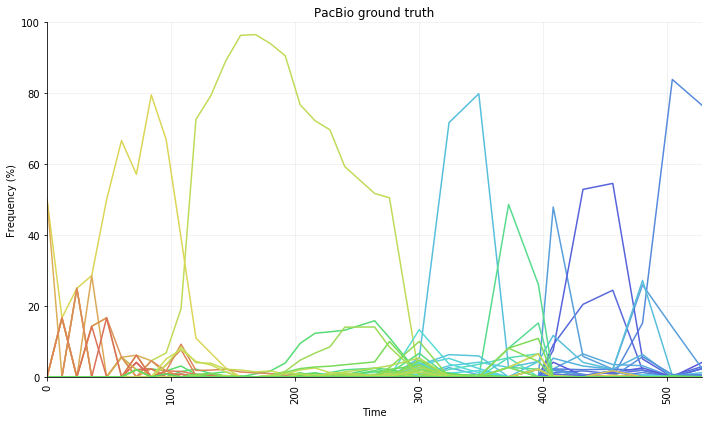

In [5]:
plot_trajectories(
    true_df, 
    out_fn = parent_script.out_dir + f'pacbio_ground_truth.png',
    title = 'PacBio ground truth'
)

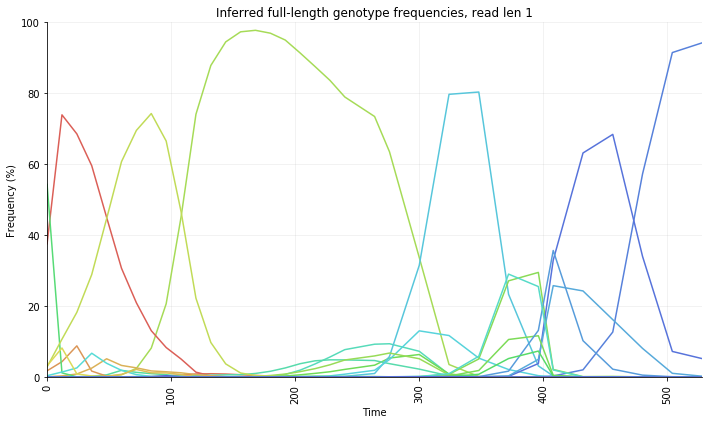

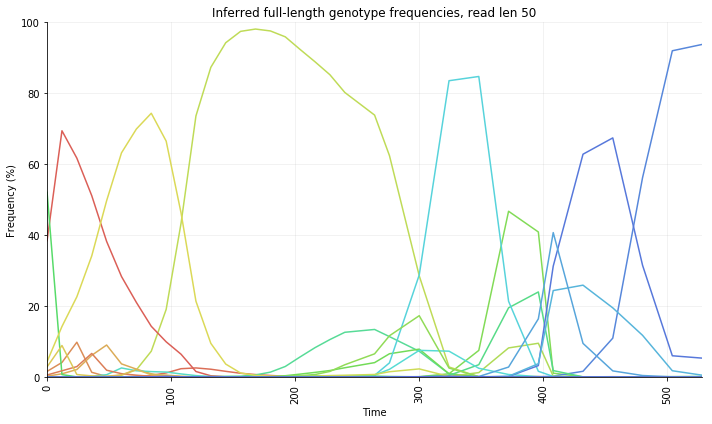

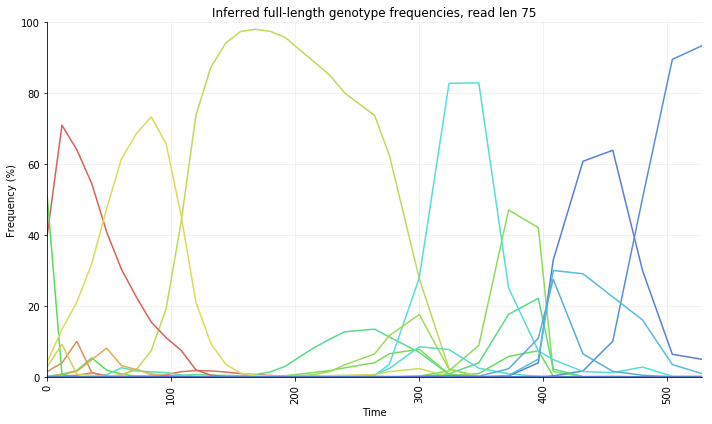

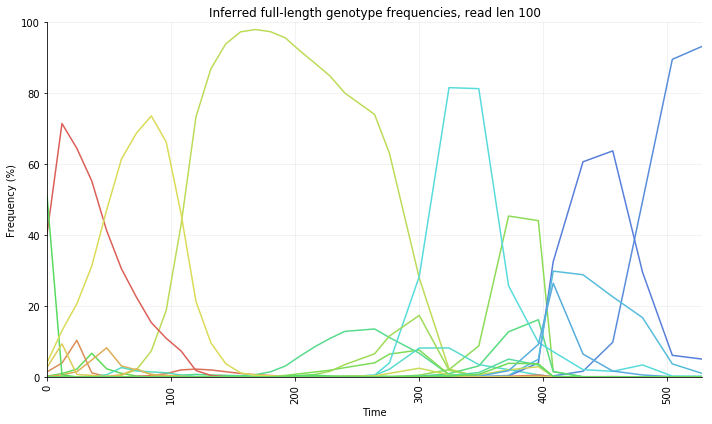

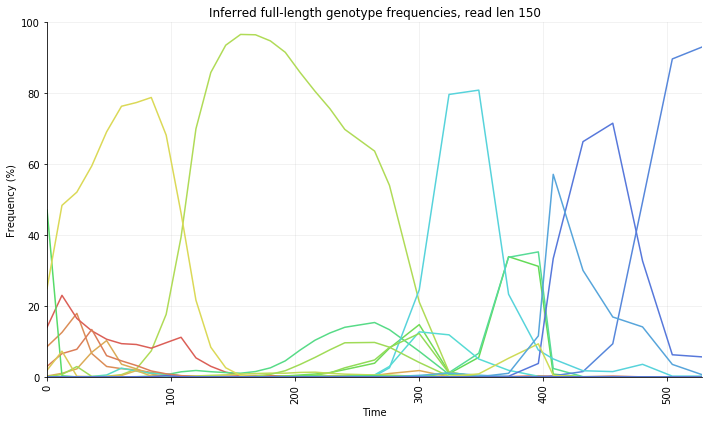

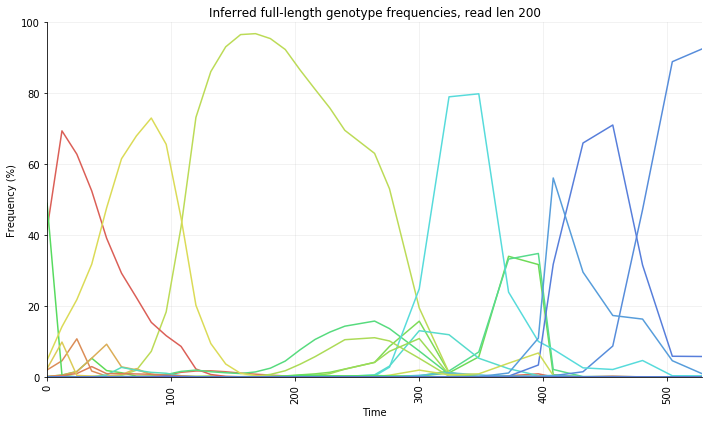

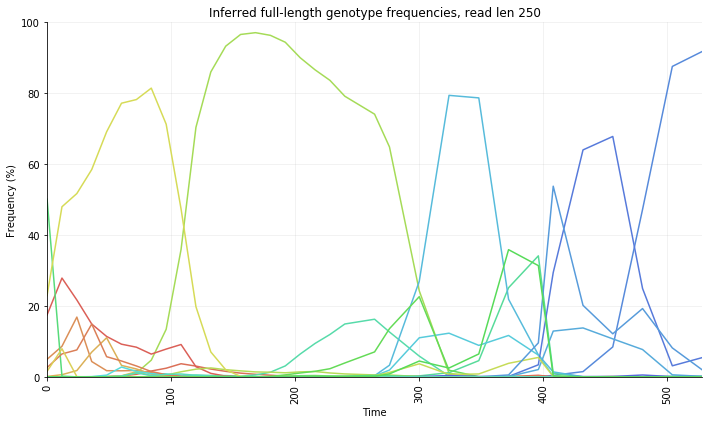

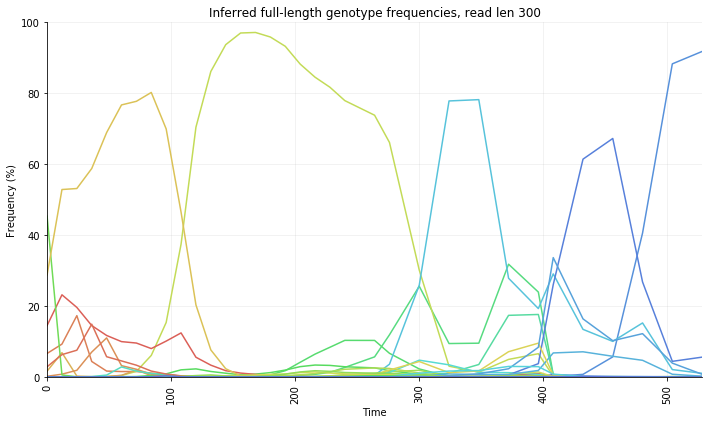

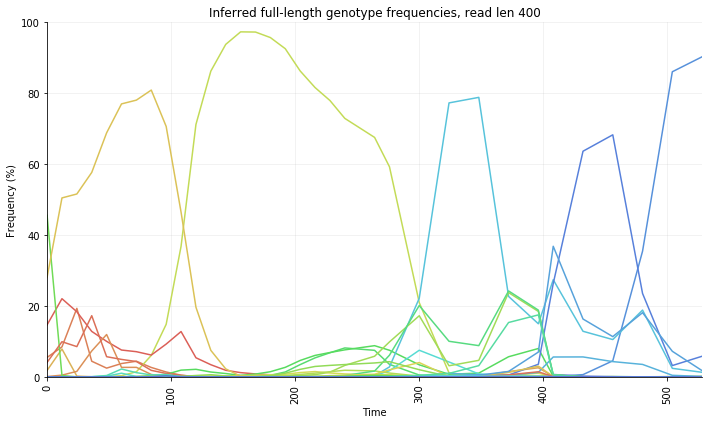

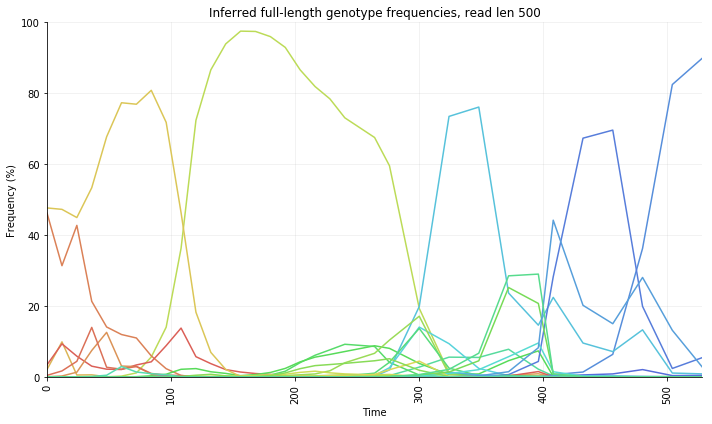

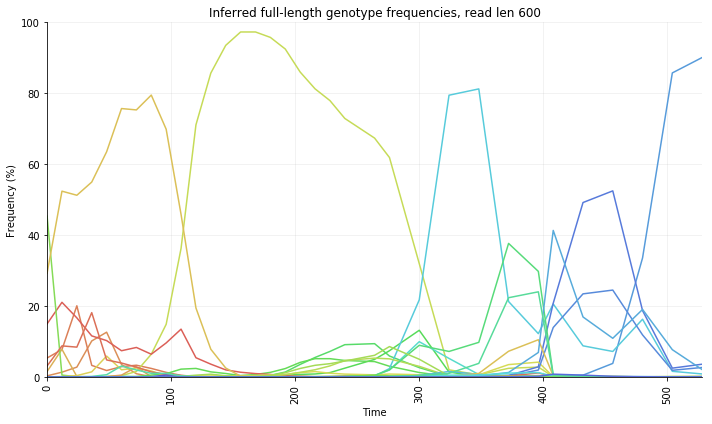

In [11]:
for read_len in read_lens:
    plot_trajectories(
        preds[read_len], 
        out_fn = parent_script.out_dir + f'pred_{read_len}.png',
        title = f'Inferred full-length genotype frequencies, read len {read_len}',
    )

## accuracy scores

In [16]:
true_df

Abbrev genotype    0        12    24        36        48        60  \
0   VIW..DNGE.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
1   VIWA.DNGE.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
2   VIWA..N.ERI.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
3   VIW..DNGE.I.YC.KSKL  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
4   VIW...NGE.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
5   VIW...N.ERI.YC.KSKL  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
6   VIWA..N.ERI.YC.KSKL  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
7   VIW...N.E.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
8   VIWA..N.E.I.YC.KSKL  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
9   ..W................  0.0  0.166667  0.00  0.000000  0.000000  0.000000   
10  V...........YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
11  VIWA..N.E.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
12  VIW...N.ERI.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
13  VIW...N.E.I.YC.KSKL  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
14  VIW...NGE.I.Y..KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
15  VIWA..NGE.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
16  VIW...NGERI.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
17  VIW..DN.E.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
18  VI.....G....YC.KS..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
19  VI..........YC.K...  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
20  VI..........YC.KS..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
21  VI.........PYC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
22  VI.........PYCDK...  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
23  VI..........YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
24  VI.........PYCDKS..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
25  VI........I.YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
26  VI........I.YC..S..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
27  VI........I.YC.K...  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
28  VI........I.YC.KS..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
29  VIW...N...I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
..                  ...  ...       ...   ...       ...       ...       ...   
50  ......N............  0.0  0.166667  0.00  0.285714  0.000000  0.055556   
51  .........R.........  0.0  0.000000  0.25  0.000000  0.000000  0.000000   
52  V.....N.E.I.YC.KS.L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
53  ..........I........  0.0  0.000000  0.00  0.142857  0.166667  0.055556   
54  ...........P.......  0.0  0.000000  0.25  0.000000  0.000000  0.000000   
55  ............YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
56  ............Y......  0.0  0.166667  0.00  0.000000  0.000000  0.000000   
57  .............C.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
58  ...............K...  0.0  0.000000  0.00  0.142857  0.000000  0.000000   
59  ................S..  0.0  0.000000  0.00  0.000000  0.166667  0.000000   
60  V.................L  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
61  V...............S..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
62  V............C.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
63  V...........Y......  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
64  V........R..YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
65  V.........IPYC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
66  V.........I.YC.KS..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
67  V.........I.YC..S..  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
68  V.........I.YC.....  0.0  0.000000  0.00  0.000000  0.000000  0.000000   
69  V..........PYCDKS..  0.0  

In [25]:
# timewise pearsonr

time_cols = [col for col in true_df.columns if col != 'Abbrev genotype']

from collections import defaultdict

all_stats = pd.DataFrame()

for read_len in read_lens:
    stats_dd = defaultdict(list)
    pred_df = preds[read_len]
    for t in time_cols:
        tdf = true_df[['Abbrev genotype', t]]
        pdf = pred_df[['Abbrev genotype', t]]

        mdf = tdf.merge(pdf, on = 'Abbrev genotype', how = 'outer', suffixes = ['_true', '_pred'])
        mdf = mdf.fillna(value = 0)

        from scipy.stats import pearsonr
        stats_dd['t'].append(t)
        stats_dd['r'].append(pearsonr(mdf[f'{t}_true'], mdf[f'{t}_pred'])[0])

    stats_df = pd.DataFrame(stats_dd)
    stats = stats_df['r'].describe()
#     display(stats)
    
    stats['Read length'] = read_len
    
    all_stats = all_stats.append(stats, ignore_index = True)
    
display(all_stats)

25%       50%       75%  Read length  count       max      mean  \
0   0.424098  0.956735  0.988590          1.0   34.0  0.999849  0.728571   
1   0.447304  0.935329  0.988947         50.0   34.0  0.999810  0.738731   
2   0.463593  0.931377  0.987842         75.0   34.0  0.999803  0.737408   
3   0.467614  0.931435  0.987680        100.0   34.0  0.999801  0.737669   
4   0.848672  0.979977  0.997072        150.0   34.0  0.999931  0.814835   
5   0.708391  0.968063  0.997034        200.0   34.0  0.999852  0.767795   
6   0.849276  0.968311  0.991864        250.0   34.0  0.999982  0.808240   
7   0.816728  0.968306  0.990714        300.0   34.0  0.999854  0.812081   
8   0.837959  0.969851  0.994337        400.0   34.0  0.999836  0.825566   
9   0.882299  0.981446  0.996086        500.0   34.0  0.999817  0.854306   
10  0.852067  0.974234  0.994096        600.0   34.0  0.999819  0.834449   

         min       std  
0  -0.057482  0.386586  
1   0.025324  0.362774  
2   0.023292  0.359930  
3   0.021822  0.359907  
4  -0.041458  0.302968  
5  -0.035123  0.359457  
6  -0.018371  0.303567  
7  -0.013373  0.301157  
8   0.018558  0.283353  
9   0.047719  0.259033  
10  0.036464  0.280320

In [27]:
# all together

time_cols = [col for col in true_df.columns if col != 'Abbrev genotype']

from collections import defaultdict

stats_dd = defaultdict(list)
for read_len in read_lens:
    pred_df = preds[read_len]
    
    pdf = pred_df.melt(id_vars = 'Abbrev genotype', var_name = 'Time', value_name = 'Frequency')
    tdf = true_df.melt(id_vars = 'Abbrev genotype', var_name = 'Time', value_name = 'Frequency')

    mdf = tdf.merge(pdf, on = ['Abbrev genotype', 'Time'], how = 'outer', suffixes = ['_true', '_pred'])
    mdf = mdf.fillna(value = 0)

    from scipy.stats import pearsonr
    stats_dd['Read length'].append(read_len)
    stats_dd['r'].append(pearsonr(mdf[f'Frequency_true'], mdf[f'Frequency_pred'])[0])

stats_df = pd.DataFrame(stats_dd)
display(stats_df)

Read length         r
0             1  0.837027
1            50  0.843088
2            75  0.841196
3           100  0.841453
4           150  0.897843
5           200  0.860215
6           250  0.893964
7           300  0.900497
8           400  0.908892
9           500  0.927960
10          600  0.912341

## all

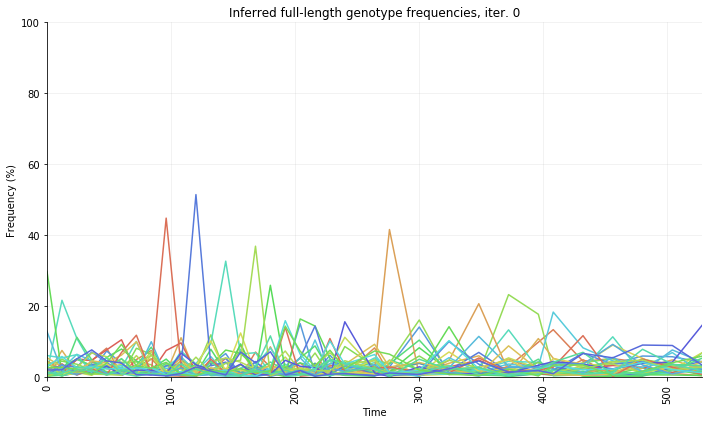

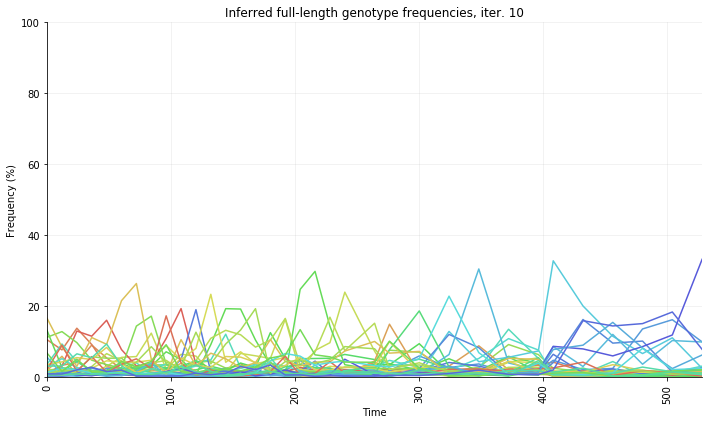

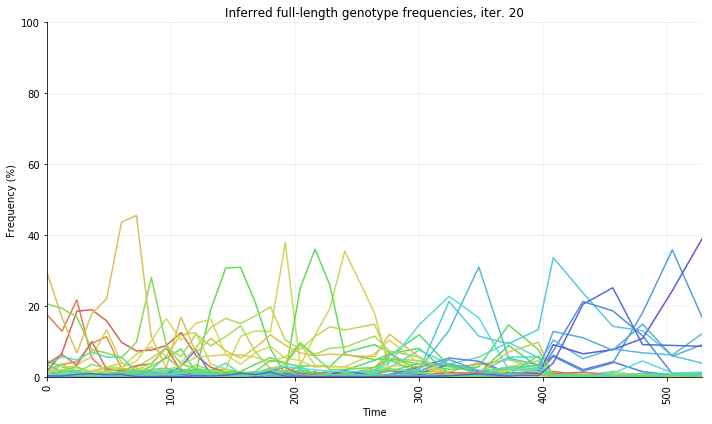

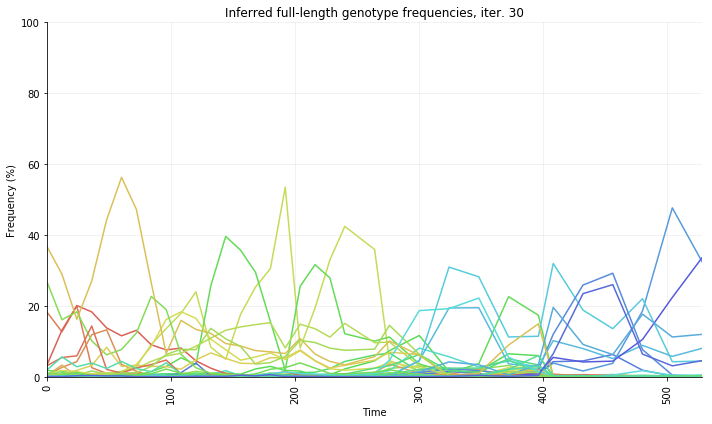

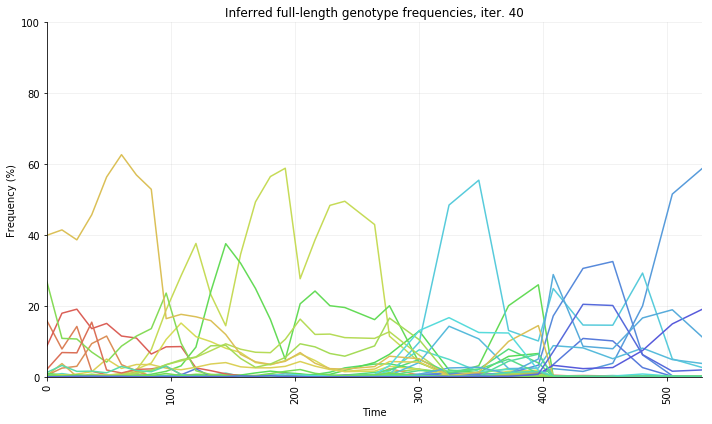

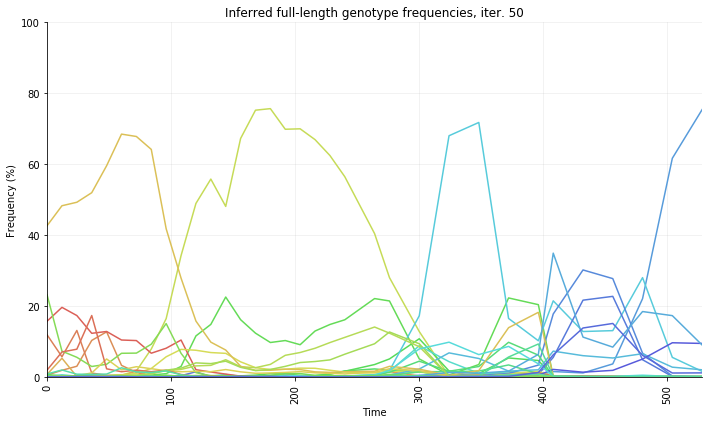

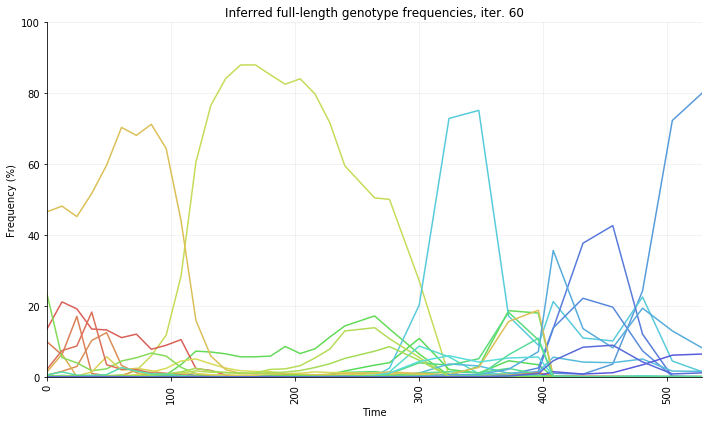

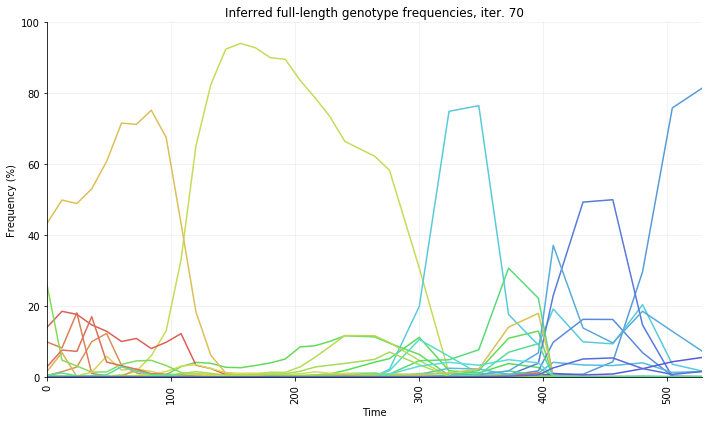

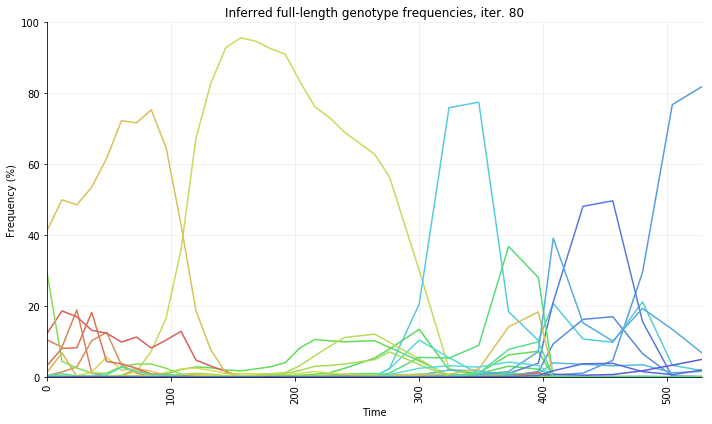

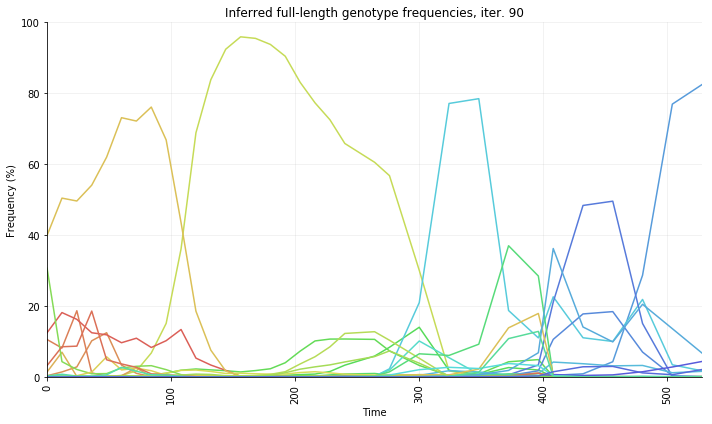

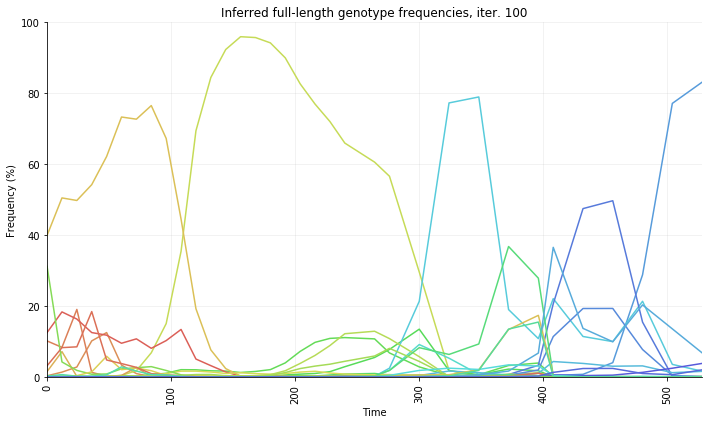

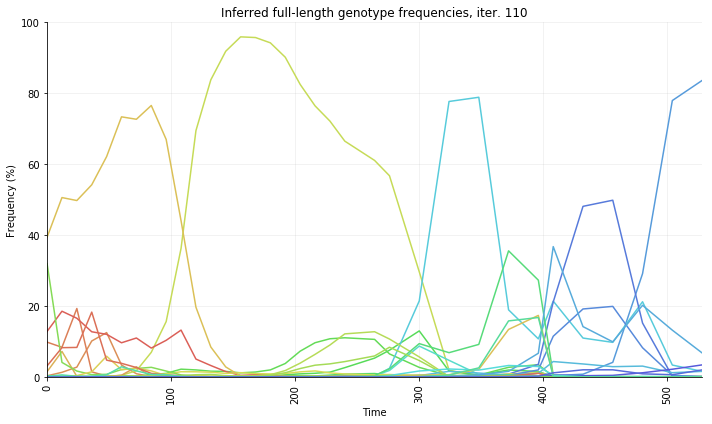

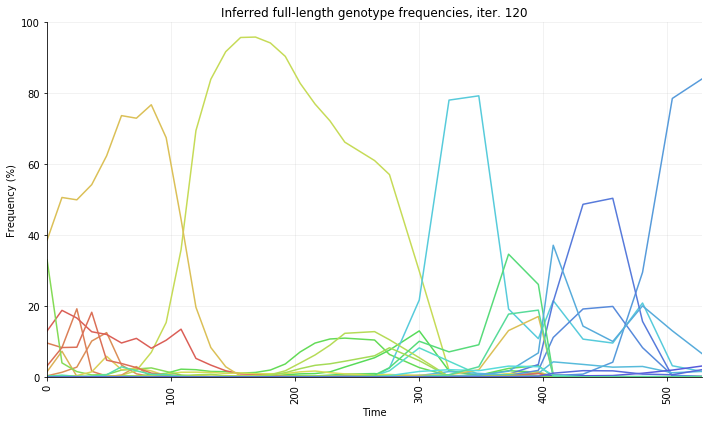

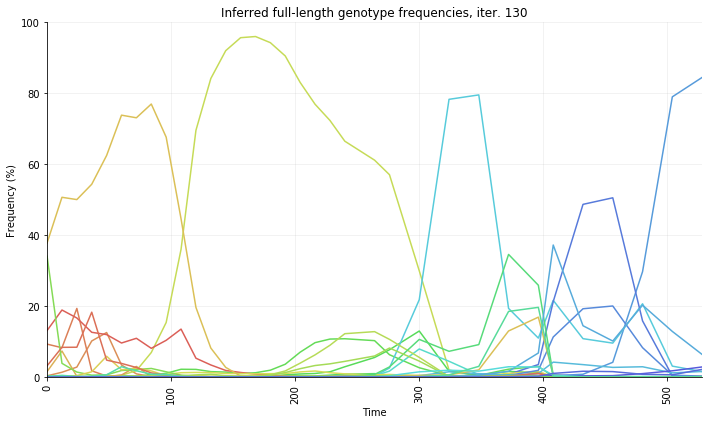

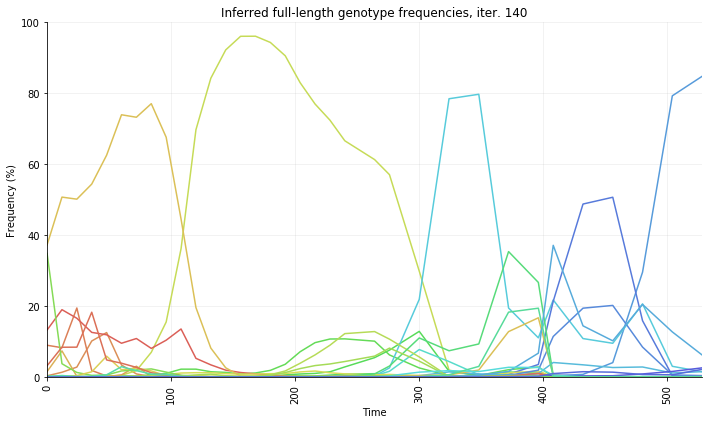

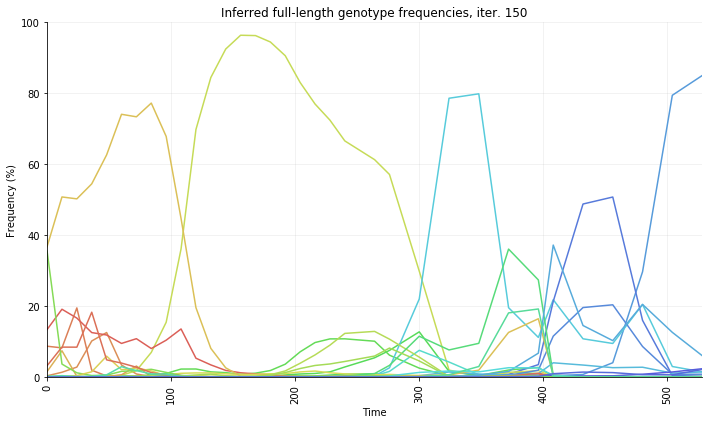

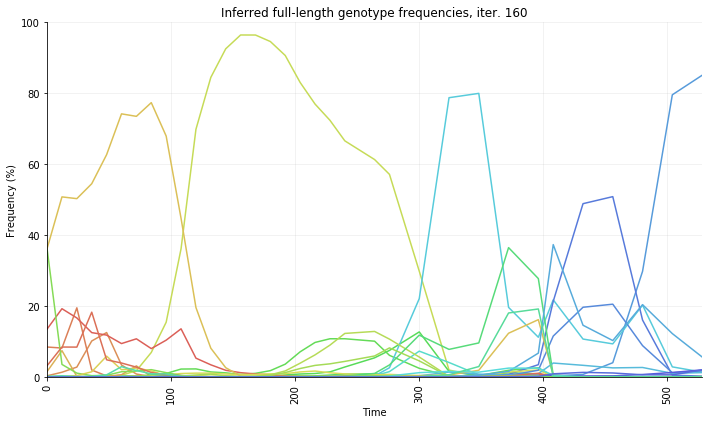

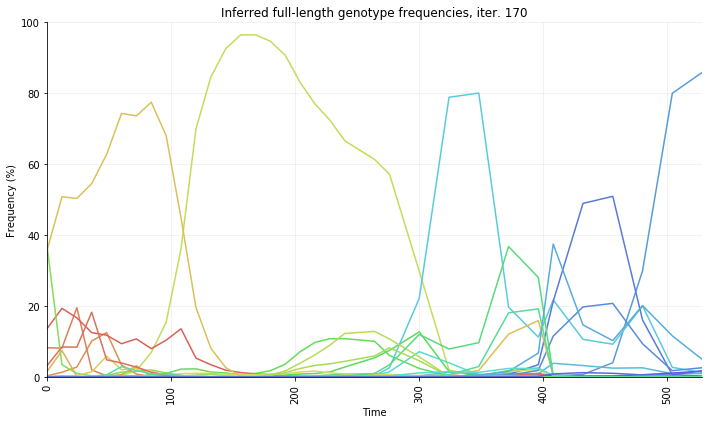

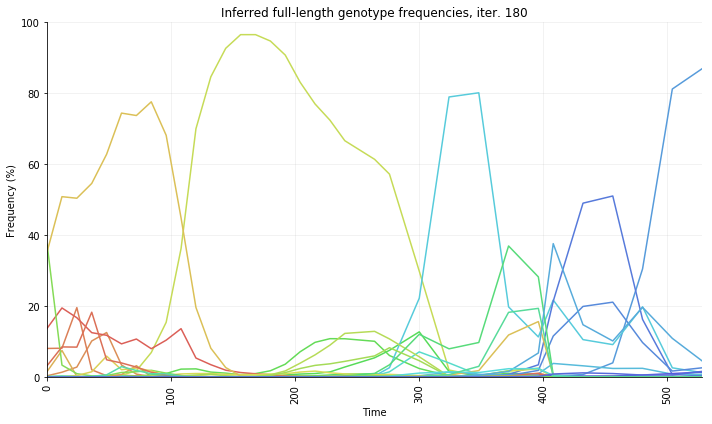

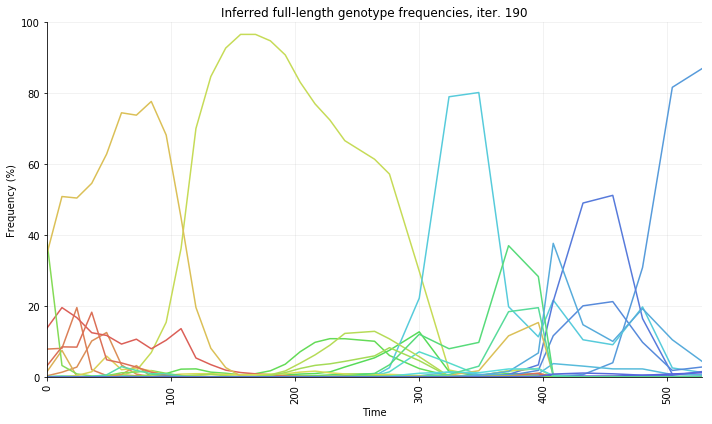

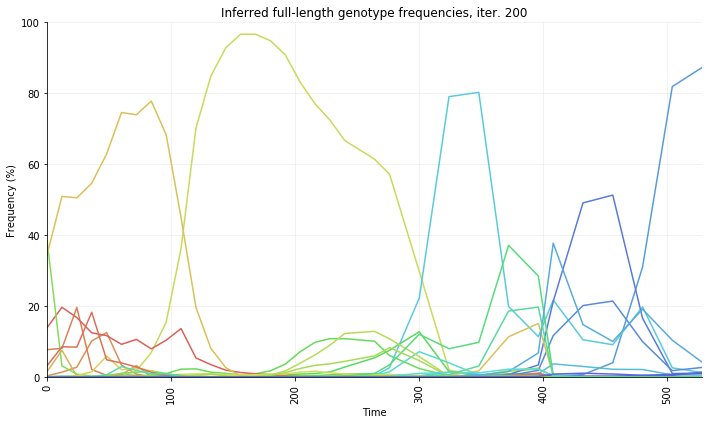

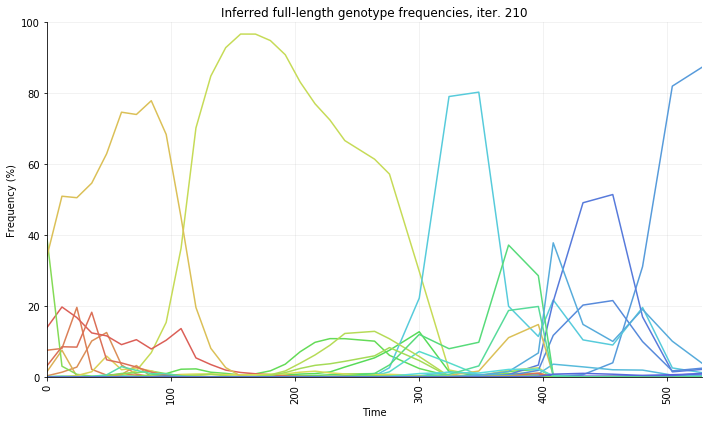

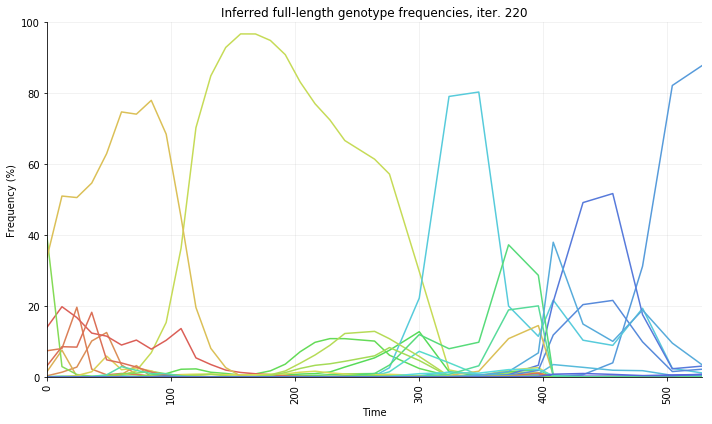

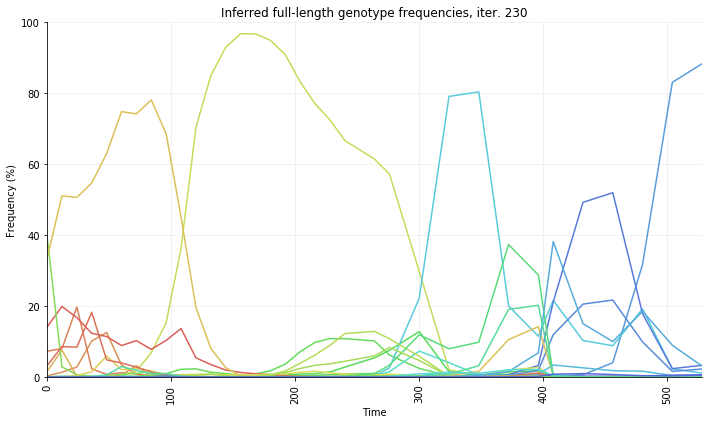

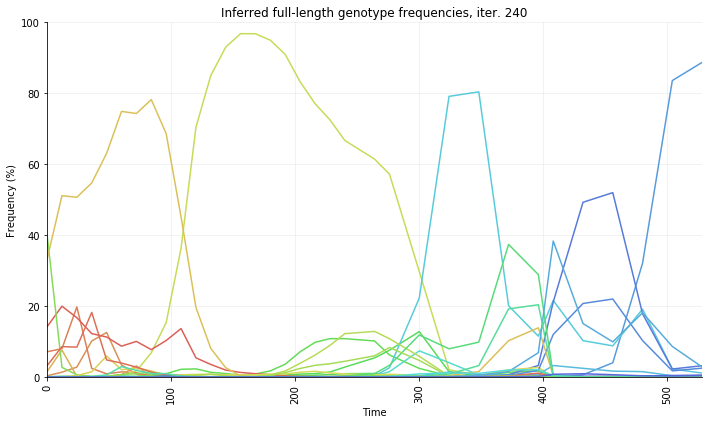

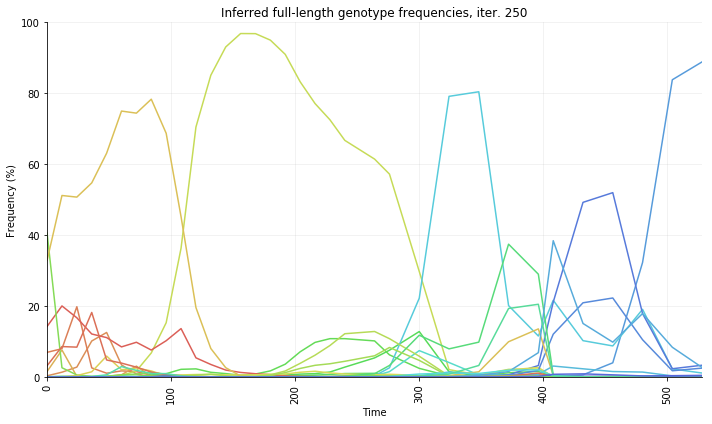

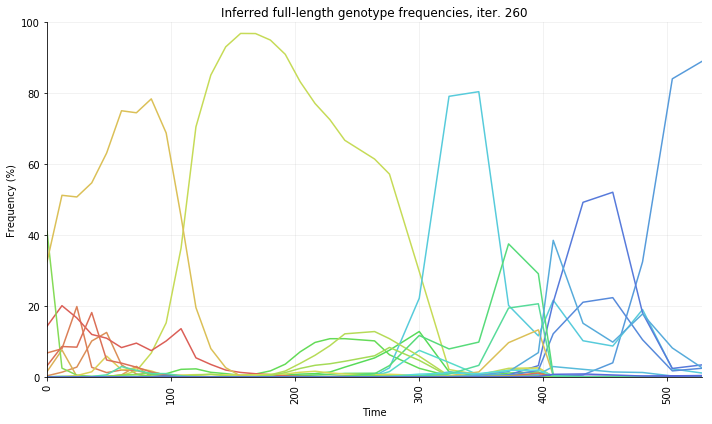

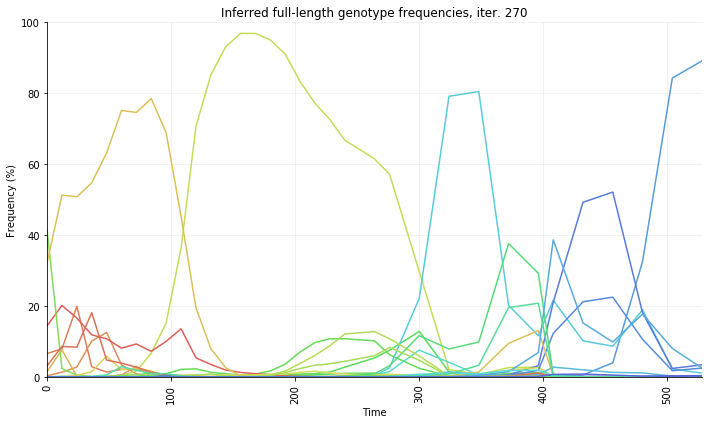

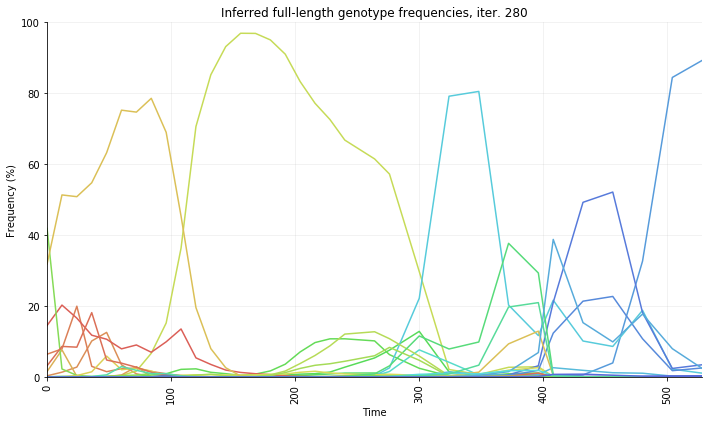

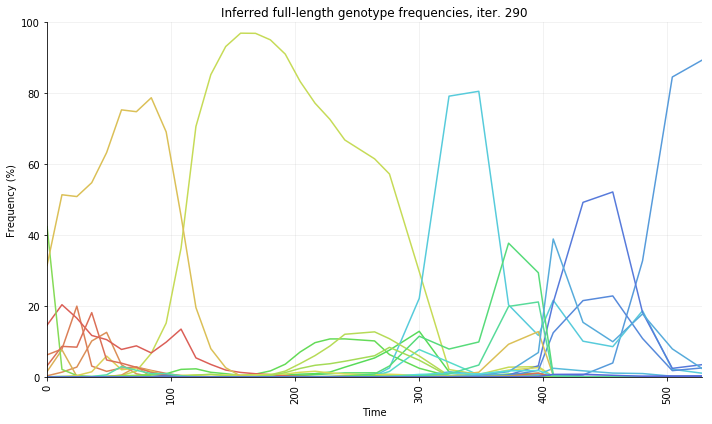

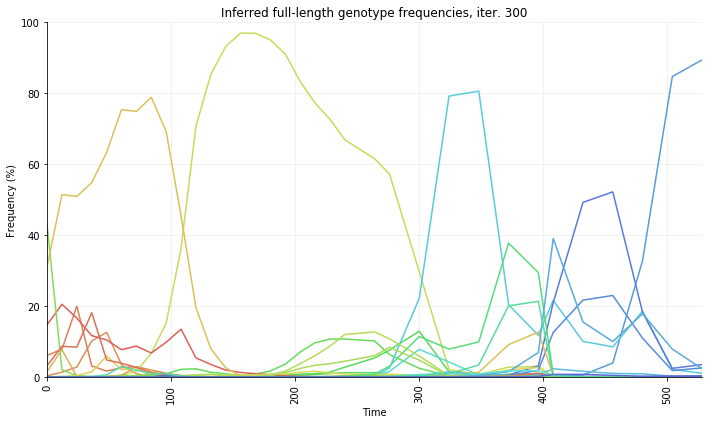

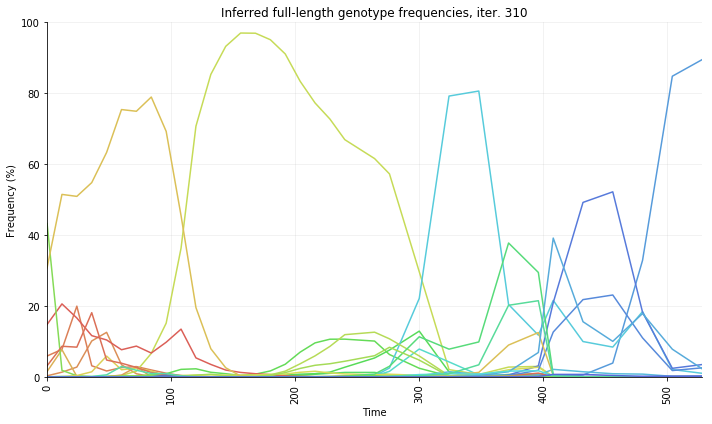

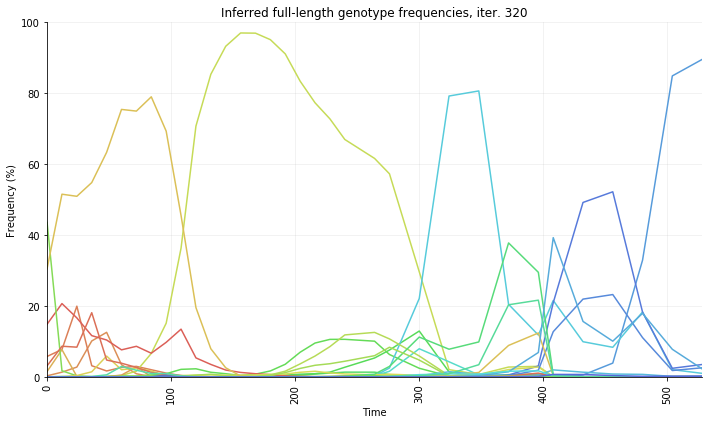

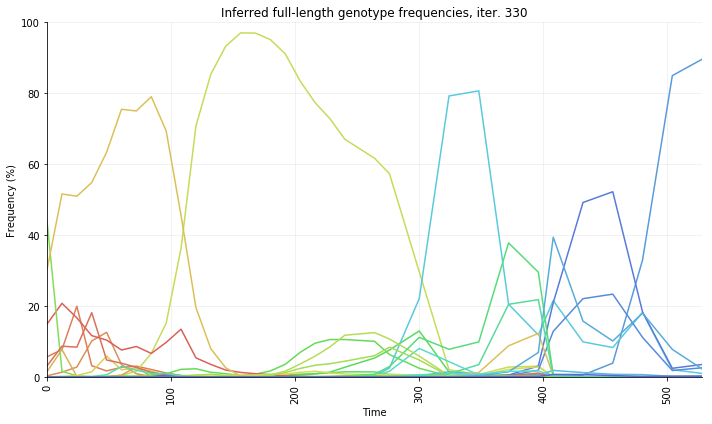

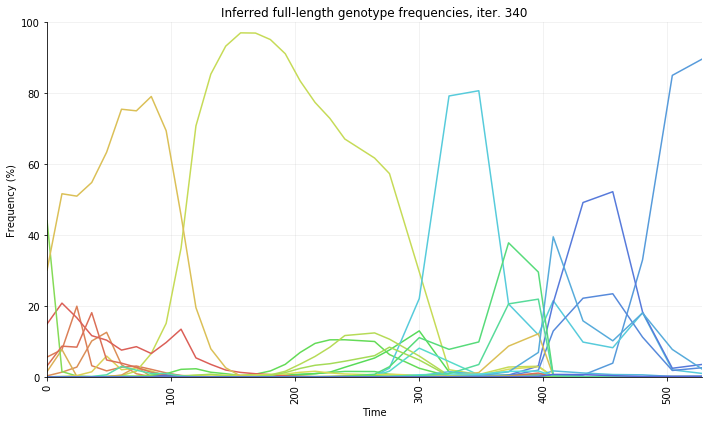

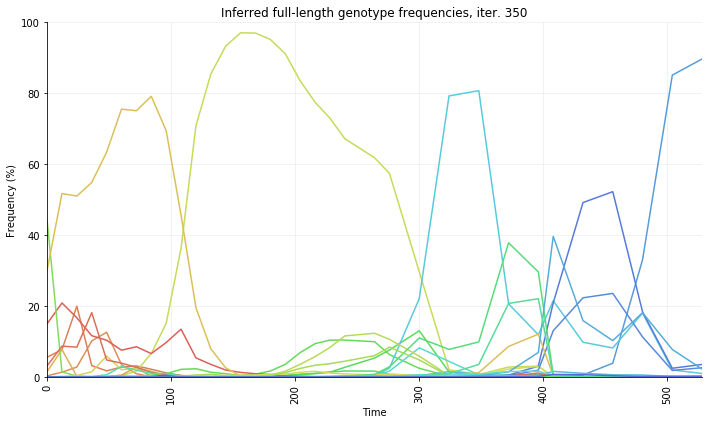

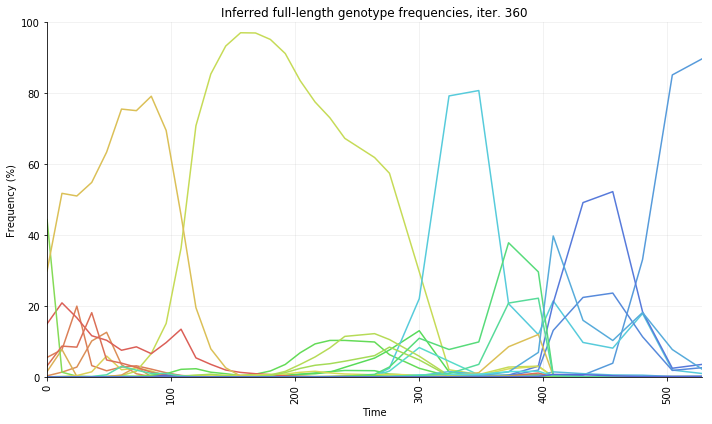

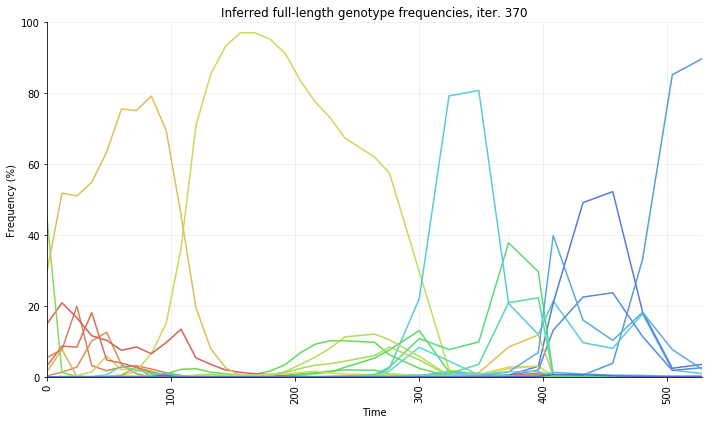

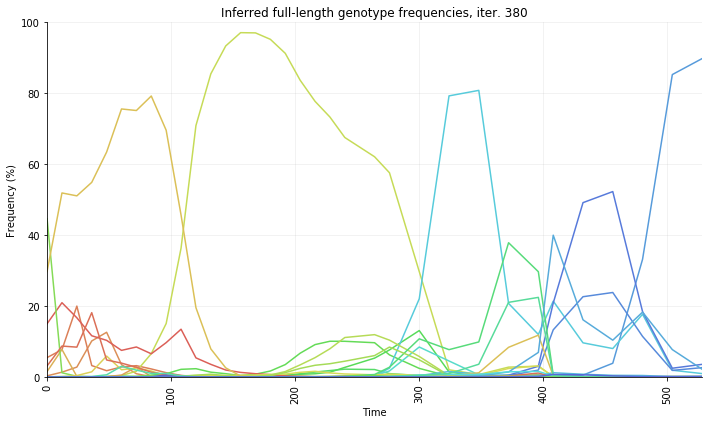

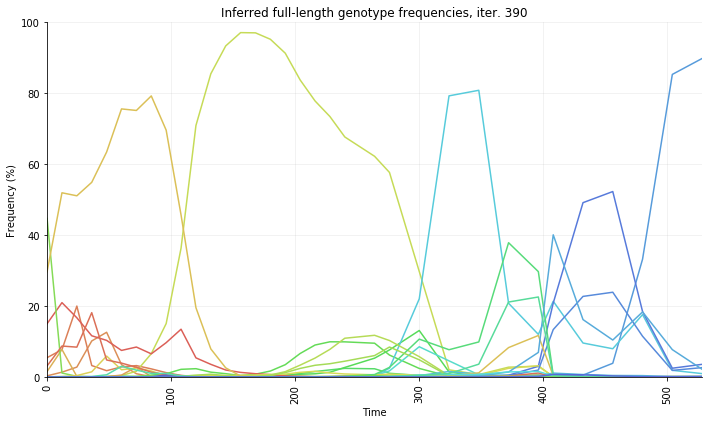

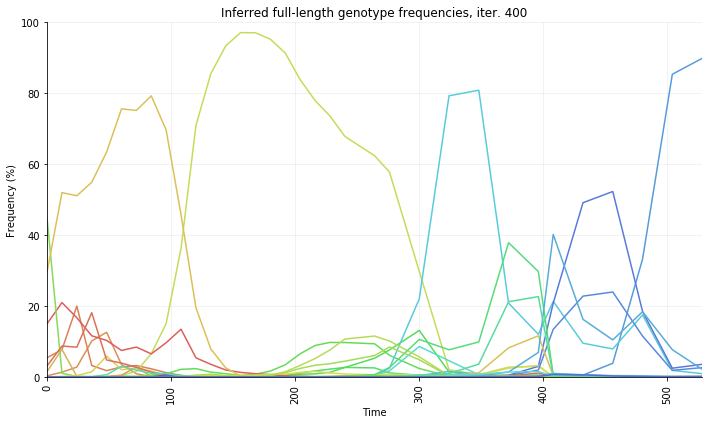

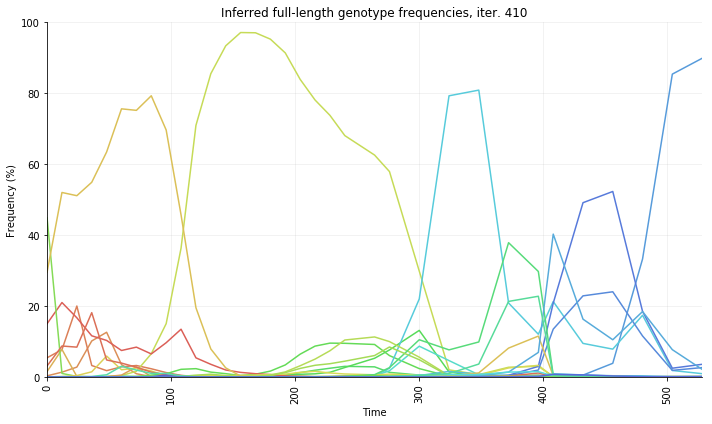

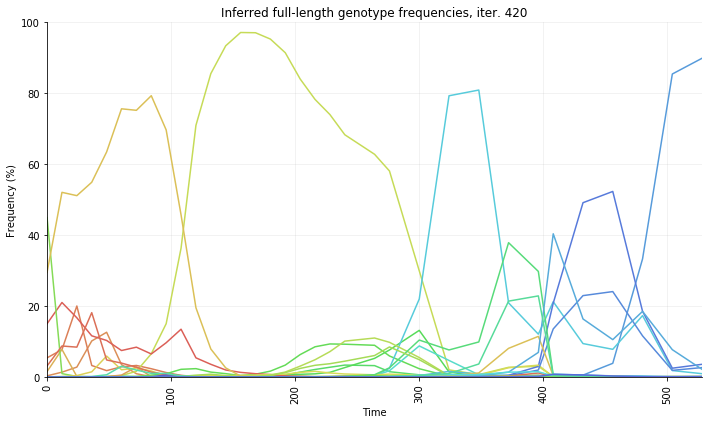

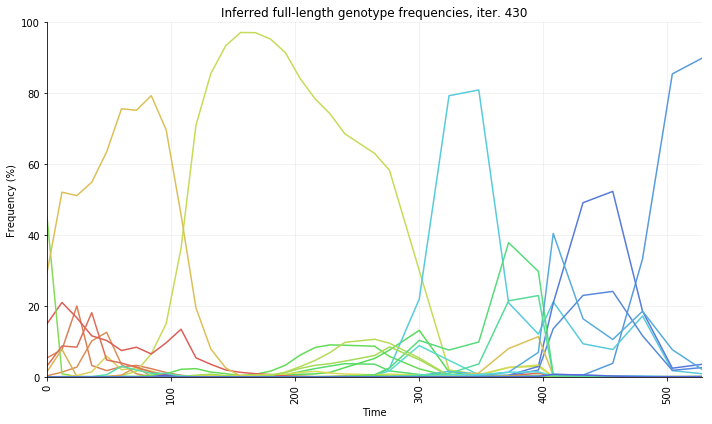

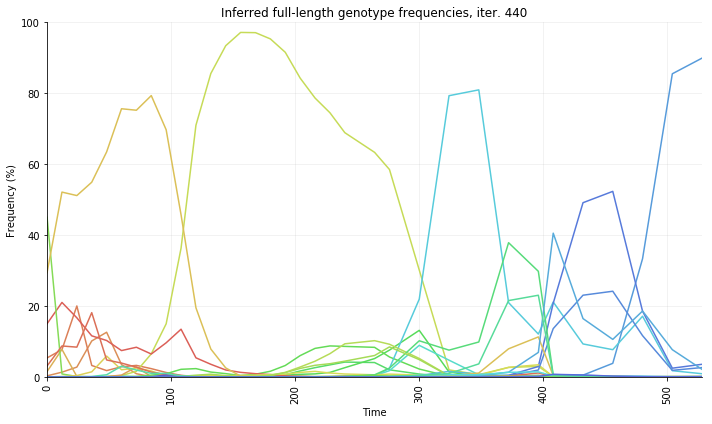

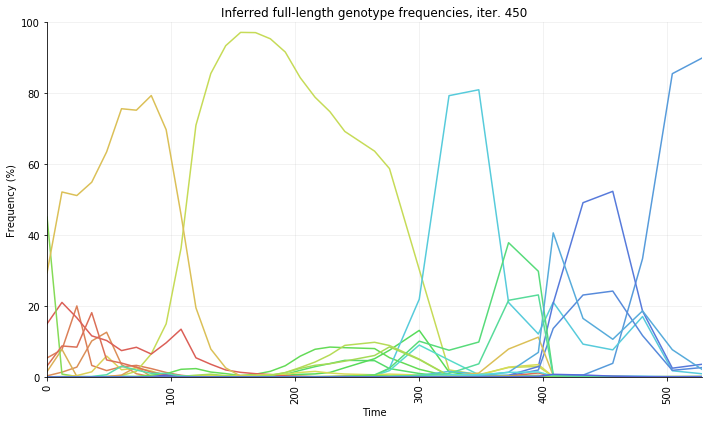

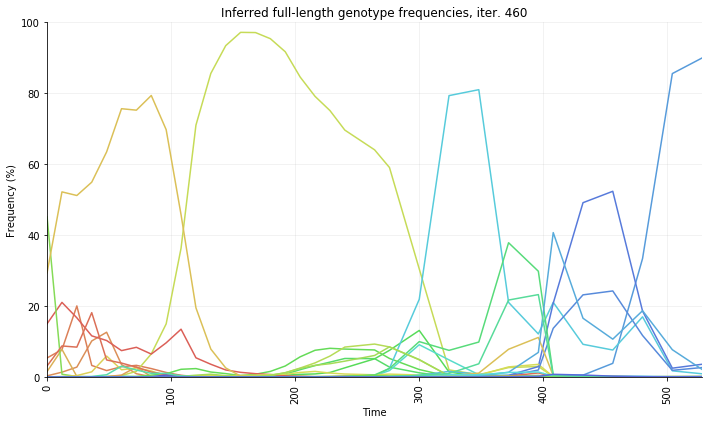

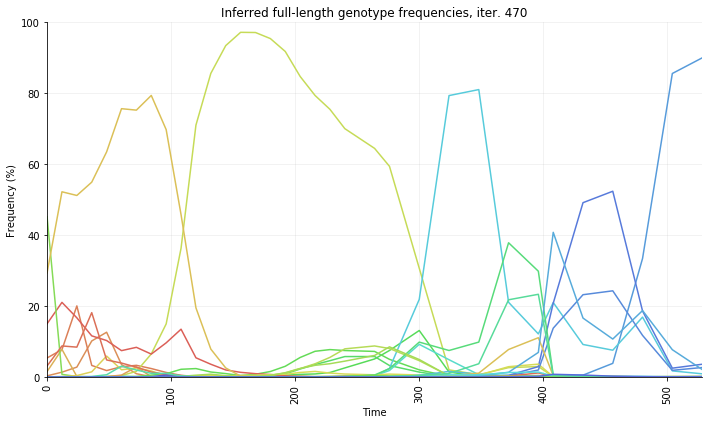

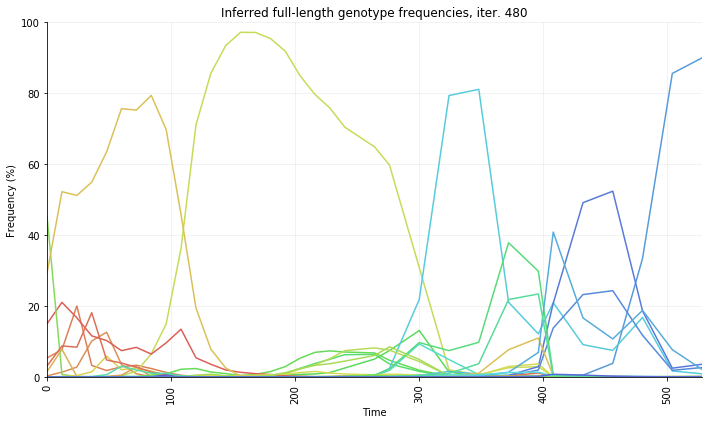

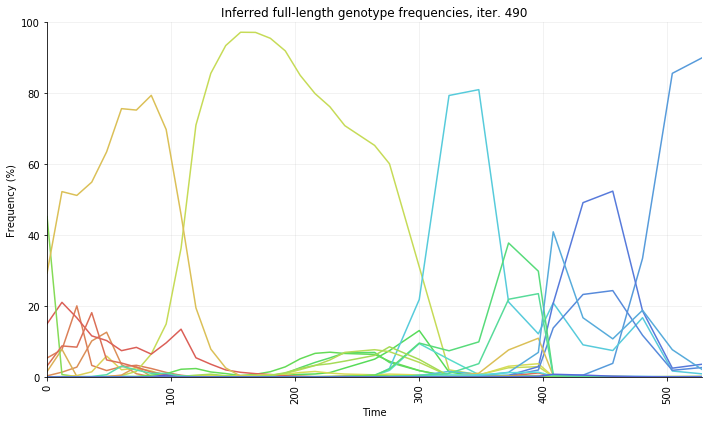

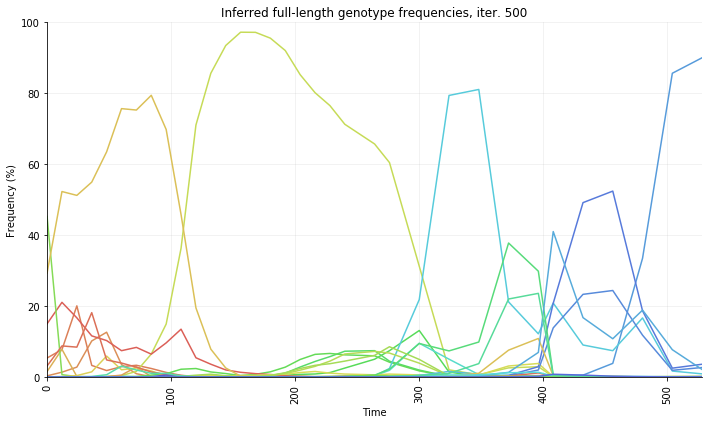

In [8]:
for idx in range(0, 510, 10):
    plot_trajectories(
        preds[idx], 
        out_fn = parent_script.out_dir + f'pred_{idx}.png',
        title = f'Inferred full-length genotype frequencies, iter. {idx}',
    )